NZ Locations Explained

cr: Cape Reinga (-34.25, 172.25)

mg: Mauraki Gulf (-36.75, 175.250

bop: Bay of Plenty (-37.25, 176.75)

r: Raglan (-37.75, 174.750

t: Taranaki (-38.75, 174.25)

cs: Cook Strait (-40.75, 174.25)

w: Wairarapa (-41.25, 176.25)

ci: Chatham Island (-43.75 -176.75)

bp: Bank Peninsula (-43.75, 173.25)

f: Fiordland (-44.25, 167.25)

op: Otago Peninsula (-45.75, 170.75)

si: Stewart Island (-47.25, 167.75)

In [7]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

!cp -r "/gdrive/MyDrive/SSTA NZ" "/content/"
!cp -r "/gdrive/MyDrive/SSTA Non NZ" "/content/"

Mounted at /gdrive


In [8]:
import glob
import os

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import time

import matplotlib.pyplot as plt

import pandas as pd

dir_path = '/content/SSTA NZ'
nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    nz[filename] = array

dir_path = '/content/SSTA Non NZ'
non_nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    non_nz[filename] = array

dir_path = '/content/SSTA NZ'

# Merge the two dictionaries into one predictor dictionary.
predictors = {}
predictors.update(nz)
predictors.update(non_nz)

In [53]:
from scipy.stats import shapiro

# Shapiro-Wilk Test (1965)
for loc in sorted(list(nz.keys())):
    print('{}, mean: {:.4f}, std: {:.4f}'.format(loc.upper(), np.mean(nz[loc]), np.std(nz[loc])))
    stat, p = shapiro(nz[loc])
    if p > 0.05:
        print("The array is normally distributed at a significance level of 0.05.")
    else:
        print("The array is not normally distributed at a significance level of 0.05.")

BOP, mean: 0.0539, std: 0.8376
The array is normally distributed at a significance level of 0.05.
BP, mean: -0.0291, std: 0.8573
The array is not normally distributed at a significance level of 0.05.
CI, mean: -0.0170, std: 0.9278
The array is not normally distributed at a significance level of 0.05.
CR, mean: 0.0652, std: 0.8237
The array is not normally distributed at a significance level of 0.05.
CS, mean: 0.0286, std: 0.6657
The array is normally distributed at a significance level of 0.05.
F, mean: 0.0519, std: 0.9631
The array is not normally distributed at a significance level of 0.05.
MG, mean: 0.0490, std: 0.8536
The array is normally distributed at a significance level of 0.05.
OP, mean: -0.0091, std: 0.7822
The array is not normally distributed at a significance level of 0.05.
R, mean: 0.0792, std: 0.8447
The array is not normally distributed at a significance level of 0.05.
SI, mean: 0.0053, std: 0.8000
The array is not normally distributed at a significance level of 0.05.


Location: R
90th Threshold: 1.0772673
80th Threshold: 0.7263537
Epoch [20/400], Avg Loss: 4.7457,  Val MSE: 0.2728
Epoch [40/400], Avg Loss: 0.9281,  Val MSE: 0.2459
Epoch [60/400], Avg Loss: 0.5412,  Val MSE: 0.2286
Epoch [80/400], Avg Loss: 0.4693,  Val MSE: 0.2236
Epoch [100/400], Avg Loss: 0.4342,  Val MSE: 0.2212
Epoch [120/400], Avg Loss: 0.4136,  Val MSE: 0.2201
Epoch [140/400], Avg Loss: 0.4016,  Val MSE: 0.2201
Epoch [160/400], Avg Loss: 0.3930,  Val MSE: 0.2211
Epoch [180/400], Avg Loss: 0.3857,  Val MSE: 0.2221
Epoch [200/400], Avg Loss: 0.3789,  Val MSE: 0.2230
Epoch [220/400], Avg Loss: 0.3732,  Val MSE: 0.2236
Epoch [240/400], Avg Loss: 0.3679,  Val MSE: 0.2244
Epoch [260/400], Avg Loss: 0.3627,  Val MSE: 0.2249
Epoch [280/400], Avg Loss: 0.3575,  Val MSE: 0.2254
Epoch [300/400], Avg Loss: 0.3528,  Val MSE: 0.2257
Epoch [320/400], Avg Loss: 0.3494,  Val MSE: 0.2262
Epoch [340/400], Avg Loss: 0.3469,  Val MSE: 0.2265
Epoch [360/400], Avg Loss: 0.3444,  Val MSE: 0.2266
Epoc

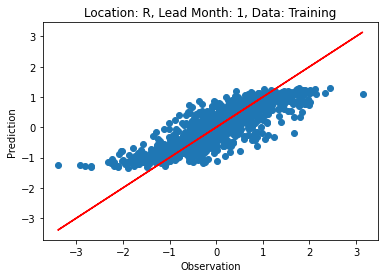

Persistence MSE: 0.2377
Test MSE: 0.2272
Persist CSI: 0.5158
Persist CSI 80: 0.6259
Test CSI: 0.2055
Test CSI 80: 0.6016


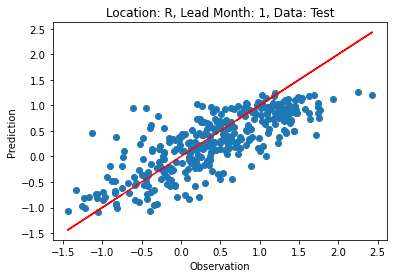

Location: CS
90th Threshold: 0.9103391
80th Threshold: 0.5539276
Epoch [20/400], Avg Loss: 4.5462,  Val MSE: 0.2096
Epoch [40/400], Avg Loss: 0.8181,  Val MSE: 0.1939
Epoch [60/400], Avg Loss: 0.4089,  Val MSE: 0.1662
Epoch [80/400], Avg Loss: 0.3329,  Val MSE: 0.1479
Epoch [100/400], Avg Loss: 0.2976,  Val MSE: 0.1344
Epoch [120/400], Avg Loss: 0.2782,  Val MSE: 0.1266
Epoch [140/400], Avg Loss: 0.2664,  Val MSE: 0.1241
Epoch [160/400], Avg Loss: 0.2578,  Val MSE: 0.1238
Epoch [180/400], Avg Loss: 0.2495,  Val MSE: 0.1239
Epoch [200/400], Avg Loss: 0.2406,  Val MSE: 0.1239
Epoch [220/400], Avg Loss: 0.2332,  Val MSE: 0.1237
Epoch [240/400], Avg Loss: 0.2272,  Val MSE: 0.1235
Epoch [260/400], Avg Loss: 0.2228,  Val MSE: 0.1235
Epoch [280/400], Avg Loss: 0.2191,  Val MSE: 0.1234
Epoch [300/400], Avg Loss: 0.2158,  Val MSE: 0.1234
Epoch [320/400], Avg Loss: 0.2126,  Val MSE: 0.1233
Epoch [340/400], Avg Loss: 0.2096,  Val MSE: 0.1233
Epoch [360/400], Avg Loss: 0.2066,  Val MSE: 0.1232
Epo

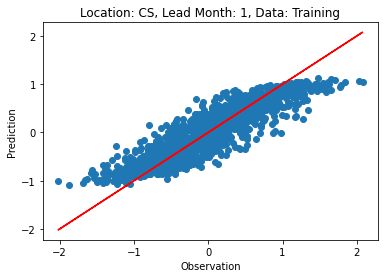

Persistence MSE: 0.1247
Test MSE: 0.1232
Persist CSI: 0.4043
Persist CSI 80: 0.5327
Test CSI: 0.3143
Test CSI 80: 0.4825


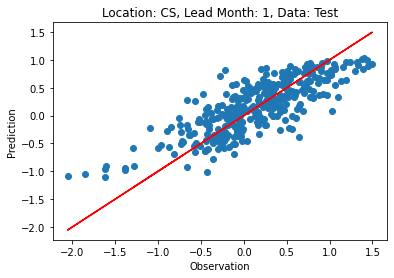

Location: SI
90th Threshold: 1.0238477
80th Threshold: 0.6232777
Epoch [20/400], Avg Loss: 4.8101,  Val MSE: 0.2984
Epoch [40/400], Avg Loss: 0.9218,  Val MSE: 0.2600
Epoch [60/400], Avg Loss: 0.5184,  Val MSE: 0.2326
Epoch [80/400], Avg Loss: 0.4473,  Val MSE: 0.2252
Epoch [100/400], Avg Loss: 0.4122,  Val MSE: 0.2230
Epoch [120/400], Avg Loss: 0.3913,  Val MSE: 0.2221
Epoch [140/400], Avg Loss: 0.3780,  Val MSE: 0.2218
Epoch [160/400], Avg Loss: 0.3684,  Val MSE: 0.2221
Epoch [180/400], Avg Loss: 0.3605,  Val MSE: 0.2226
Epoch [200/400], Avg Loss: 0.3538,  Val MSE: 0.2233
Epoch [220/400], Avg Loss: 0.3493,  Val MSE: 0.2241
Epoch [240/400], Avg Loss: 0.3461,  Val MSE: 0.2250
Epoch [260/400], Avg Loss: 0.3424,  Val MSE: 0.2259
Epoch [280/400], Avg Loss: 0.3384,  Val MSE: 0.2268
Epoch [300/400], Avg Loss: 0.3354,  Val MSE: 0.2276
Epoch [320/400], Avg Loss: 0.3322,  Val MSE: 0.2284
Epoch [340/400], Avg Loss: 0.3297,  Val MSE: 0.2292
Epoch [360/400], Avg Loss: 0.3275,  Val MSE: 0.2299
Epo

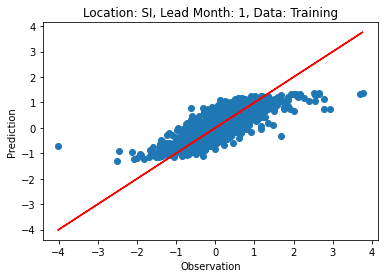

Persistence MSE: 0.2440
Test MSE: 0.2309
Persist CSI: 0.4545
Persist CSI 80: 0.4646
Test CSI: 0.4595
Test CSI 80: 0.4646


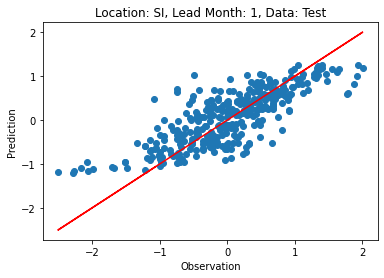

Location: CR
90th Threshold: 1.0850446
80th Threshold: 0.6930024
Epoch [20/400], Avg Loss: 4.8302,  Val MSE: 0.2714
Epoch [40/400], Avg Loss: 0.9788,  Val MSE: 0.2431
Epoch [60/400], Avg Loss: 0.5975,  Val MSE: 0.2192
Epoch [80/400], Avg Loss: 0.5362,  Val MSE: 0.2167
Epoch [100/400], Avg Loss: 0.5029,  Val MSE: 0.2164
Epoch [120/400], Avg Loss: 0.4802,  Val MSE: 0.2170
Epoch [140/400], Avg Loss: 0.4646,  Val MSE: 0.2182
Epoch [160/400], Avg Loss: 0.4516,  Val MSE: 0.2194
Epoch [180/400], Avg Loss: 0.4401,  Val MSE: 0.2203
Epoch [200/400], Avg Loss: 0.4315,  Val MSE: 0.2210
Epoch [220/400], Avg Loss: 0.4256,  Val MSE: 0.2216
Epoch [240/400], Avg Loss: 0.4200,  Val MSE: 0.2221
Epoch [260/400], Avg Loss: 0.4140,  Val MSE: 0.2226
Epoch [280/400], Avg Loss: 0.4089,  Val MSE: 0.2230
Epoch [300/400], Avg Loss: 0.4050,  Val MSE: 0.2233
Epoch [320/400], Avg Loss: 0.4024,  Val MSE: 0.2235
Epoch [340/400], Avg Loss: 0.4001,  Val MSE: 0.2240
Epoch [360/400], Avg Loss: 0.3978,  Val MSE: 0.2243
Epo

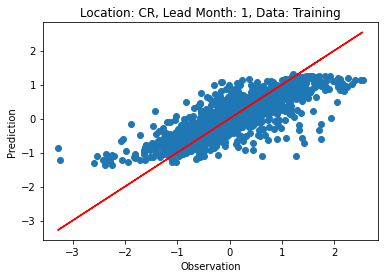

Persistence MSE: 0.2468
Test MSE: 0.2249
Persist CSI: 0.3286
Persist CSI 80: 0.4959
Test CSI: 0.1538
Test CSI 80: 0.4348


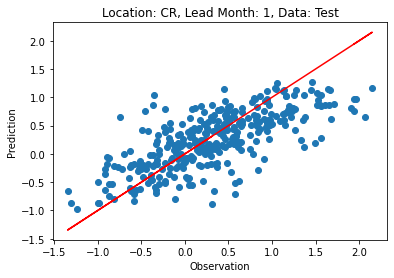

Location: OP
90th Threshold: 0.9955503
80th Threshold: 0.6495769
Epoch [20/400], Avg Loss: 4.7637,  Val MSE: 0.3575
Epoch [40/400], Avg Loss: 0.9707,  Val MSE: 0.3351
Epoch [60/400], Avg Loss: 0.5483,  Val MSE: 0.2983
Epoch [80/400], Avg Loss: 0.4608,  Val MSE: 0.2884
Epoch [100/400], Avg Loss: 0.4254,  Val MSE: 0.2847
Epoch [120/400], Avg Loss: 0.4058,  Val MSE: 0.2821
Epoch [140/400], Avg Loss: 0.3916,  Val MSE: 0.2806
Epoch [160/400], Avg Loss: 0.3804,  Val MSE: 0.2792
Epoch [180/400], Avg Loss: 0.3716,  Val MSE: 0.2779
Epoch [200/400], Avg Loss: 0.3641,  Val MSE: 0.2769
Epoch [220/400], Avg Loss: 0.3574,  Val MSE: 0.2764
Epoch [240/400], Avg Loss: 0.3508,  Val MSE: 0.2764
Epoch [260/400], Avg Loss: 0.3451,  Val MSE: 0.2767
Epoch [280/400], Avg Loss: 0.3400,  Val MSE: 0.2769
Epoch [300/400], Avg Loss: 0.3348,  Val MSE: 0.2771
Epoch [320/400], Avg Loss: 0.3303,  Val MSE: 0.2773
Epoch [340/400], Avg Loss: 0.3264,  Val MSE: 0.2774
Epoch [360/400], Avg Loss: 0.3232,  Val MSE: 0.2775
Epo

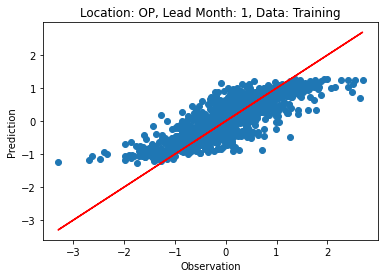

Persistence MSE: 0.3155
Test MSE: 0.2775
Persist CSI: 0.3478
Persist CSI 80: 0.4198
Test CSI: 0.4103
Test CSI 80: 0.4557


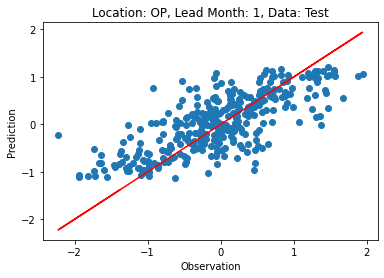

Location: T
90th Threshold: 1.2497799
80th Threshold: 0.8168559
Epoch [20/400], Avg Loss: 4.8392,  Val MSE: 0.4826
Epoch [40/400], Avg Loss: 1.0070,  Val MSE: 0.4175
Epoch [60/400], Avg Loss: 0.6144,  Val MSE: 0.3921
Epoch [80/400], Avg Loss: 0.5292,  Val MSE: 0.3840
Epoch [100/400], Avg Loss: 0.4827,  Val MSE: 0.3835
Epoch [120/400], Avg Loss: 0.4508,  Val MSE: 0.3830
Epoch [140/400], Avg Loss: 0.4283,  Val MSE: 0.3837
Epoch [160/400], Avg Loss: 0.4156,  Val MSE: 0.3858
Epoch [180/400], Avg Loss: 0.4081,  Val MSE: 0.3883
Epoch [200/400], Avg Loss: 0.4034,  Val MSE: 0.3906
Epoch [220/400], Avg Loss: 0.3995,  Val MSE: 0.3927
Epoch [240/400], Avg Loss: 0.3965,  Val MSE: 0.3941
Epoch [260/400], Avg Loss: 0.3942,  Val MSE: 0.3954
Epoch [280/400], Avg Loss: 0.3920,  Val MSE: 0.3968
Epoch [300/400], Avg Loss: 0.3905,  Val MSE: 0.3980
Epoch [320/400], Avg Loss: 0.3888,  Val MSE: 0.3992
Epoch [340/400], Avg Loss: 0.3872,  Val MSE: 0.4003
Epoch [360/400], Avg Loss: 0.3859,  Val MSE: 0.4014
Epoc

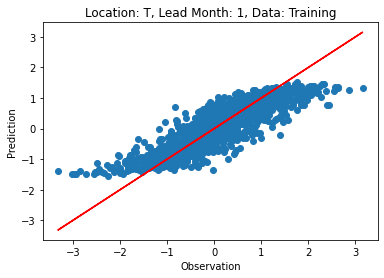

Persistence MSE: 0.3926
Test MSE: 0.4034
Persist CSI: 0.4595
Persist CSI 80: 0.5541
Test CSI: 0.3659
Test CSI 80: 0.5782


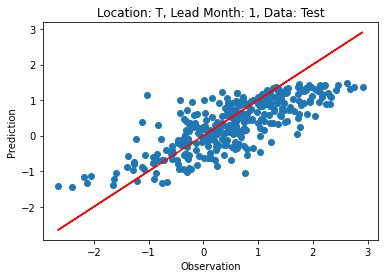

Location: BP
90th Threshold: 1.1166999
80th Threshold: 0.6538955
Epoch [20/400], Avg Loss: 4.8713,  Val MSE: 0.4492
Epoch [40/400], Avg Loss: 1.0225,  Val MSE: 0.4014
Epoch [60/400], Avg Loss: 0.6467,  Val MSE: 0.3825
Epoch [80/400], Avg Loss: 0.5714,  Val MSE: 0.3814
Epoch [100/400], Avg Loss: 0.5293,  Val MSE: 0.3805
Epoch [120/400], Avg Loss: 0.5011,  Val MSE: 0.3800
Epoch [140/400], Avg Loss: 0.4843,  Val MSE: 0.3798
Epoch [160/400], Avg Loss: 0.4739,  Val MSE: 0.3799
Epoch [180/400], Avg Loss: 0.4647,  Val MSE: 0.3804
Epoch [200/400], Avg Loss: 0.4569,  Val MSE: 0.3806
Epoch [220/400], Avg Loss: 0.4515,  Val MSE: 0.3808
Epoch [240/400], Avg Loss: 0.4470,  Val MSE: 0.3810
Epoch [260/400], Avg Loss: 0.4427,  Val MSE: 0.3812
Epoch [280/400], Avg Loss: 0.4390,  Val MSE: 0.3815
Epoch [300/400], Avg Loss: 0.4355,  Val MSE: 0.3817
Epoch [320/400], Avg Loss: 0.4324,  Val MSE: 0.3819
Epoch [340/400], Avg Loss: 0.4302,  Val MSE: 0.3821
Epoch [360/400], Avg Loss: 0.4286,  Val MSE: 0.3822
Epo

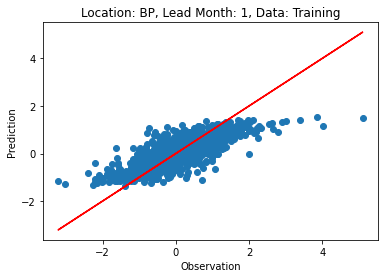

Persistence MSE: 0.4665
Test MSE: 0.3825
Persist CSI: 0.1875
Persist CSI 80: 0.2949
Test CSI: 0.1600
Test CSI 80: 0.2899


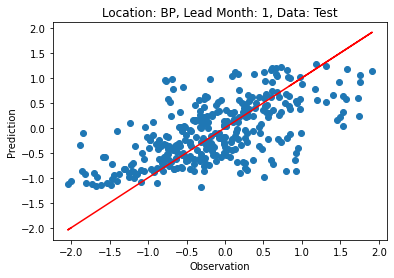

Location: BOP
90th Threshold: 1.1172504
80th Threshold: 0.72880715
Epoch [20/400], Avg Loss: 4.7441,  Val MSE: 0.1929
Epoch [40/400], Avg Loss: 0.9835,  Val MSE: 0.1720
Epoch [60/400], Avg Loss: 0.5683,  Val MSE: 0.1580
Epoch [80/400], Avg Loss: 0.4928,  Val MSE: 0.1512
Epoch [100/400], Avg Loss: 0.4642,  Val MSE: 0.1492
Epoch [120/400], Avg Loss: 0.4456,  Val MSE: 0.1485
Epoch [140/400], Avg Loss: 0.4332,  Val MSE: 0.1485
Epoch [160/400], Avg Loss: 0.4238,  Val MSE: 0.1487
Epoch [180/400], Avg Loss: 0.4148,  Val MSE: 0.1491
Epoch [200/400], Avg Loss: 0.4063,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3987,  Val MSE: 0.1497
Epoch [240/400], Avg Loss: 0.3922,  Val MSE: 0.1501
Epoch [260/400], Avg Loss: 0.3863,  Val MSE: 0.1504
Epoch [280/400], Avg Loss: 0.3817,  Val MSE: 0.1506
Epoch [300/400], Avg Loss: 0.3788,  Val MSE: 0.1510
Epoch [320/400], Avg Loss: 0.3769,  Val MSE: 0.1513
Epoch [340/400], Avg Loss: 0.3747,  Val MSE: 0.1517
Epoch [360/400], Avg Loss: 0.3730,  Val MSE: 0.1519
E

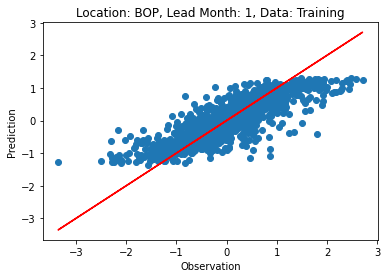

Persistence MSE: 0.1690
Test MSE: 0.1522
Persist CSI: 0.3846
Persist CSI 80: 0.4717
Test CSI: 0.0714
Test CSI 80: 0.4211


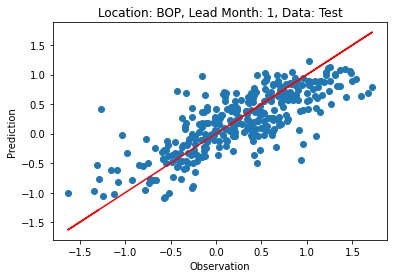

Location: W
90th Threshold: 1.331288
80th Threshold: 0.8579866
Epoch [20/400], Avg Loss: 4.9460,  Val MSE: 0.5960
Epoch [40/400], Avg Loss: 1.1504,  Val MSE: 0.5171
Epoch [60/400], Avg Loss: 0.7316,  Val MSE: 0.4825
Epoch [80/400], Avg Loss: 0.6211,  Val MSE: 0.4737
Epoch [100/400], Avg Loss: 0.5638,  Val MSE: 0.4761
Epoch [120/400], Avg Loss: 0.5338,  Val MSE: 0.4800
Epoch [140/400], Avg Loss: 0.5186,  Val MSE: 0.4835
Epoch [160/400], Avg Loss: 0.5094,  Val MSE: 0.4864
Epoch [180/400], Avg Loss: 0.5016,  Val MSE: 0.4901
Epoch [200/400], Avg Loss: 0.4952,  Val MSE: 0.4928
Epoch [220/400], Avg Loss: 0.4896,  Val MSE: 0.4951
Epoch [240/400], Avg Loss: 0.4850,  Val MSE: 0.4970
Epoch [260/400], Avg Loss: 0.4810,  Val MSE: 0.4981
Epoch [280/400], Avg Loss: 0.4770,  Val MSE: 0.4989
Epoch [300/400], Avg Loss: 0.4743,  Val MSE: 0.4994
Epoch [320/400], Avg Loss: 0.4728,  Val MSE: 0.5000
Epoch [340/400], Avg Loss: 0.4717,  Val MSE: 0.5007
Epoch [360/400], Avg Loss: 0.4703,  Val MSE: 0.5015
Epoch

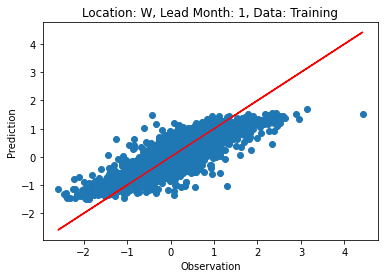

Persistence MSE: 0.4578
Test MSE: 0.5030
Persist CSI: 0.4607
Persist CSI 80: 0.5541
Test CSI: 0.2647
Test CSI 80: 0.4755


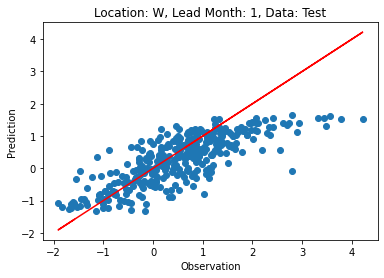

Location: F
90th Threshold: 1.1551478
80th Threshold: 0.71359485
Epoch [20/400], Avg Loss: 4.9412,  Val MSE: 0.3554
Epoch [40/400], Avg Loss: 1.0628,  Val MSE: 0.3237
Epoch [60/400], Avg Loss: 0.6627,  Val MSE: 0.3063
Epoch [80/400], Avg Loss: 0.5745,  Val MSE: 0.2978
Epoch [100/400], Avg Loss: 0.5334,  Val MSE: 0.2962
Epoch [120/400], Avg Loss: 0.5068,  Val MSE: 0.2977
Epoch [140/400], Avg Loss: 0.4880,  Val MSE: 0.3003
Epoch [160/400], Avg Loss: 0.4746,  Val MSE: 0.3025
Epoch [180/400], Avg Loss: 0.4639,  Val MSE: 0.3041
Epoch [200/400], Avg Loss: 0.4554,  Val MSE: 0.3055
Epoch [220/400], Avg Loss: 0.4493,  Val MSE: 0.3067
Epoch [240/400], Avg Loss: 0.4449,  Val MSE: 0.3076
Epoch [260/400], Avg Loss: 0.4404,  Val MSE: 0.3086
Epoch [280/400], Avg Loss: 0.4371,  Val MSE: 0.3096
Epoch [300/400], Avg Loss: 0.4345,  Val MSE: 0.3104
Epoch [320/400], Avg Loss: 0.4322,  Val MSE: 0.3109
Epoch [340/400], Avg Loss: 0.4301,  Val MSE: 0.3116
Epoch [360/400], Avg Loss: 0.4280,  Val MSE: 0.3120
Epo

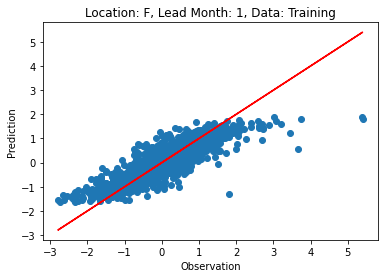

Persistence MSE: 0.3402
Test MSE: 0.3126
Persist CSI: 0.4699
Persist CSI 80: 0.5500
Test CSI: 0.3750
Test CSI 80: 0.5752


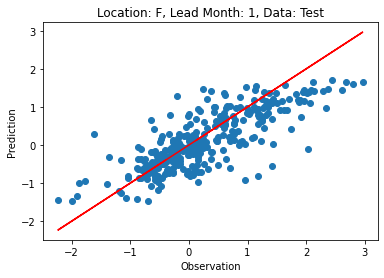

Location: CI
90th Threshold: 1.3186705
80th Threshold: 0.7413428
Epoch [20/400], Avg Loss: 4.8400,  Val MSE: 0.3264
Epoch [40/400], Avg Loss: 1.0798,  Val MSE: 0.2818
Epoch [60/400], Avg Loss: 0.6633,  Val MSE: 0.2651
Epoch [80/400], Avg Loss: 0.5675,  Val MSE: 0.2611
Epoch [100/400], Avg Loss: 0.5169,  Val MSE: 0.2581
Epoch [120/400], Avg Loss: 0.4902,  Val MSE: 0.2563
Epoch [140/400], Avg Loss: 0.4732,  Val MSE: 0.2559
Epoch [160/400], Avg Loss: 0.4614,  Val MSE: 0.2557
Epoch [180/400], Avg Loss: 0.4514,  Val MSE: 0.2559
Epoch [200/400], Avg Loss: 0.4429,  Val MSE: 0.2565
Epoch [220/400], Avg Loss: 0.4346,  Val MSE: 0.2571
Epoch [240/400], Avg Loss: 0.4266,  Val MSE: 0.2577
Epoch [260/400], Avg Loss: 0.4183,  Val MSE: 0.2583
Epoch [280/400], Avg Loss: 0.4111,  Val MSE: 0.2588
Epoch [300/400], Avg Loss: 0.4049,  Val MSE: 0.2591
Epoch [320/400], Avg Loss: 0.4004,  Val MSE: 0.2594
Epoch [340/400], Avg Loss: 0.3962,  Val MSE: 0.2596
Epoch [360/400], Avg Loss: 0.3921,  Val MSE: 0.2598
Epo

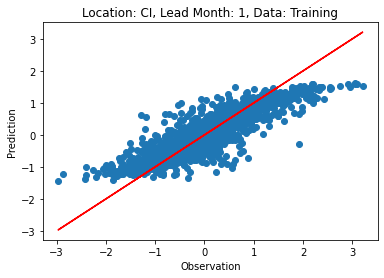

Persistence MSE: 0.3095
Test MSE: 0.2600
Persist CSI: 0.2174
Persist CSI 80: 0.4211
Test CSI: 0.1765
Test CSI 80: 0.3824


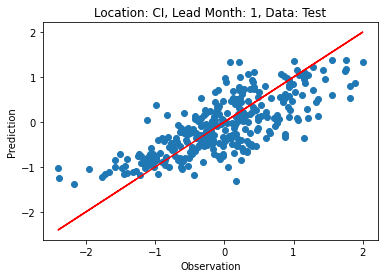

Location: MG
90th Threshold: 1.0850612
80th Threshold: 0.71098405
Epoch [20/400], Avg Loss: 4.7634,  Val MSE: 0.2866
Epoch [40/400], Avg Loss: 0.9585,  Val MSE: 0.2571
Epoch [60/400], Avg Loss: 0.5841,  Val MSE: 0.2430
Epoch [80/400], Avg Loss: 0.5157,  Val MSE: 0.2376
Epoch [100/400], Avg Loss: 0.4819,  Val MSE: 0.2361
Epoch [120/400], Avg Loss: 0.4590,  Val MSE: 0.2351
Epoch [140/400], Avg Loss: 0.4415,  Val MSE: 0.2348
Epoch [160/400], Avg Loss: 0.4283,  Val MSE: 0.2346
Epoch [180/400], Avg Loss: 0.4183,  Val MSE: 0.2345
Epoch [200/400], Avg Loss: 0.4108,  Val MSE: 0.2344
Epoch [220/400], Avg Loss: 0.4054,  Val MSE: 0.2342
Epoch [240/400], Avg Loss: 0.4009,  Val MSE: 0.2342
Epoch [260/400], Avg Loss: 0.3967,  Val MSE: 0.2343
Epoch [280/400], Avg Loss: 0.3934,  Val MSE: 0.2343
Epoch [300/400], Avg Loss: 0.3903,  Val MSE: 0.2343
Epoch [320/400], Avg Loss: 0.3871,  Val MSE: 0.2343
Epoch [340/400], Avg Loss: 0.3837,  Val MSE: 0.2343
Epoch [360/400], Avg Loss: 0.3807,  Val MSE: 0.2343
Ep

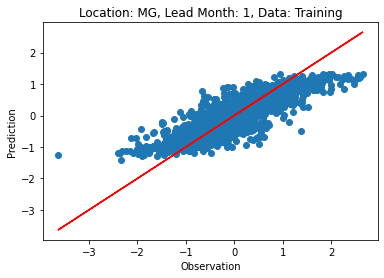

Persistence MSE: 0.2668
Test MSE: 0.2344
Persist CSI: 0.4386
Persist CSI 80: 0.3750
Test CSI: 0.2273
Test CSI 80: 0.3832


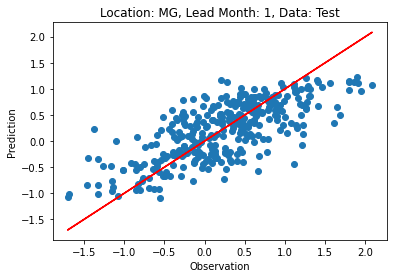

In [28]:
net_class = 'FCN'
num_layer = 2
num_hid_feat = 100
num_hid_feat_2 = 50
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
weight_decay = 0.01
l1_ratio = 1
regularization = 'EN' + str(l1_ratio) + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 20

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_hid_feat_2)
        self.fc4 = nn.Linear(num_hid_feat_2, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

for lead_time in [1]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1
    
    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_persist_csi = []
    all_persist_csi_80 = []
    all_test_csi = []
    all_test_csi_80 = []
    all_training_time = []

    for loc in list(nz.keys()):
        
        print('Location:', loc.upper())
        
        y = nz[loc]
        y_all = y

        x_all = [np.column_stack([predictors[list(predictors.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
        y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
        x_all = np.swapaxes(x_all, 1, 2)
        x_all_flat = np.array(x_all).reshape(-1, num_var*6)
        y_all = np.array(y_all)

        num_train = int(len(x_all) * train_split)
        x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
        x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

        # The threshold for defining outliers using the 90th percentile
        y_train_sorted = np.sort(y_train.numpy().squeeze())
        threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
        threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]
        print('90th Threshold:', threshold)
        print('80th Threshold:', threshold_low)

        model = FCN(x_all_flat.shape[1], num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate)
        optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        criterion = nn.MSELoss()

        # Start time
        start = time.time()

        for epoch in range(num_train_epochs):
            epoch_loss = 0
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                y_pred = model(x_batch)
                loss = criterion(y_pred, y_batch)
                # L2 Reg
                """
                l2_reg = 0.0
                for param in model.parameters():
                    l2_reg += torch.norm(param)
                loss += weight_decay * l2_reg
                """
                # Elastic Net Reg
                # l1_ratio = 0 is the L2 reg.
                # l1_ratio = 1 is the L1 reg.
                l1_reg = 0.0
                l2_reg = 0.0
                for param in model.parameters():
                    l1_reg += torch.norm(param, 1)
                    l2_reg += torch.norm(param, 2)
                loss += weight_decay * (l1_ratio * l1_reg + (1 - l1_ratio) * l2_reg)
                optim.zero_grad()
                loss.backward()
                optim.step()
                if (epoch+1) % 20 == 0:
                    #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                    epoch_loss += loss.item()
            with torch.no_grad():
                y_pred = model(x_test)
                val_mse = criterion(y_pred, y_test)     
            if (epoch+1) % 20 == 0:
                epoch_loss /= len(x_train) // batch_size   
                print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))

        # End time
        stop = time.time()
        training_time = float(stop - start)

        with torch.no_grad():
            y_pred = model(x_train)

        plt.scatter(y_train, y_pred)
        x = y_train
        y = y_train
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Training'.format(loc.upper(), lead_time))
        plt.show()

        with torch.no_grad():
            persist_mse = criterion(y_test[:-lead_time], y_test[lead_time:])
            y_pred = model(x_test)
            test_mse = criterion(y_pred, y_test)
            print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
            print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI: {:.4f}'.format(persist_csi))
        pred_pos = [float(i) > threshold_low for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold_low for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi_80 = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI 80: {:.4f}'.format(persist_csi_80))
        
        pred_pos = [float(i) > threshold for i in y_pred]
        y_test_pos = [float(i) > threshold for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(y_pred))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))
        pred_pos = [float(i) > threshold_low for i in y_pred]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(y_pred))]
        test_csi_80 = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI 80: {:.4f}'.format(test_csi_80))

        plt.scatter(y_test, y_pred)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

        all_loc.append(loc.upper())
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(round(test_csi, 4))
        all_test_csi_80.append(round(test_csi_80, 4))
        all_persist_csi.append(round(persist_csi, 4))
        all_persist_csi_80.append(round(persist_csi_80, 4))
        all_training_time.append(round(training_time, 4))

In [21]:
all_persist_mse_float = [round(float(i), 4) for i in all_persist_mse]
all_test_mse_float = [round(float(i), 4) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Persist CSI': all_persist_csi, 'Persist CSI 80': all_persist_csi_80, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi, 'Test CSI 80': all_test_csi_80, 'Training Time': all_training_time})
test_results = test_results.sort_values(by='Location')
test_results

,Location,Persistence MSE,Persist CSI,Persist CSI 80,Test MSE,Test CSI,Test CSI 80,Training Time
7,BOP,0.1690,0.3846,0.4717,0.1531,0.0714,0.4211,17.7669
6,BP,0.4665,0.1875,0.2949,0.3823,0.1600,0.2857,18.5713
10,CI,0.3095,0.2174,0.4211,0.2598,0.1765,0.3824,17.8980
3,CR,0.2468,0.3286,0.4959,0.2288,0.1346,0.4298,18.0992
1,CS,0.1247,0.4043,0.5327,0.1233,0.3143,0.4737,18.8366
9,F,0.3402,0.4699,0.5500,0.3143,0.3611,0.5752,18.3555
11,MG,0.2668,0.4386,0.3750,0.2366,0.1860,0.3670,19.4565
4,OP,0.3155,0.3478,0.4198,0.2782,0.3846,0.4557,18.8216
0,R,0.2377,0.5158,0.6259,0.2268,0.2055,0.5938,18.3413
2,SI,0.2440,0.4545,0.4646,0.2282,0.4595,0.4646,18.9585
